<a href="https://colab.research.google.com/github/LuFernandez/imagaynes/blob/master/TpFiltros/TPimagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP2 - Filtros 
###Ezequiel Vijande
###Lucero Guadalupe Fernandez

###Imports a utilizar

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output

Cargamos imágenes

In [13]:
!wget https://raw.githubusercontent.com/lufernandez/imagaynes/master/TpFiltros/boost.PNG
!wget https://raw.githubusercontent.com/lufernandez/imagaynes/master/TpFiltros/cameraman.tif
!wget https://raw.githubusercontent.com/lufernandez/imagaynes/master/TpFiltros/eight.tif
!wget https://raw.githubusercontent.com/lufernandez/imagaynes/master/TpFiltros/moon.png
!wget https://raw.githubusercontent.com/lufernandez/imagaynes/master/TpFiltros/tun.jpg
!wget https://raw.githubusercontent.com/lufernandez/imagaynes/master/TpFiltros/zebra.png
!wget https://raw.githubusercontent.com/lufernandez/imagaynes/master/TpFiltros/Letra_a.png

clear_output()

###1. Letra A

####mostramos imagen original y definimos funciones a utilizar

In [64]:
#definimos la funcion del filtro: recibe el tamaño del kernel,
#y la imagen sobre la que se aplica el filtro
def ApplyLowPass(img, k_size=3):
  kernel = np.full((k_size, k_size), 1)/(k_size**2)
  return cv2.filter2D(img,-1,kernel)

#ploteamos secuencia
def MakeSubplot(img,fig,row,column,index,title):
  fig.add_subplot(row,column,index)
  plt.title(title)
  plt.axis('off')
  plt.imshow(img,cmap='gray', vmin=0)

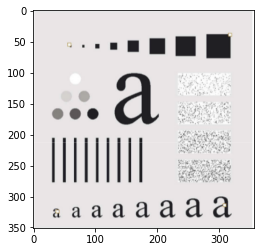

In [37]:
letra_a = cv2.imread('Letra_a.png')
plt.imshow(letra_a, cmap='gray')

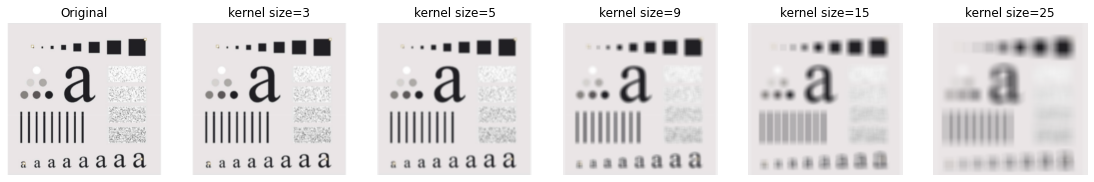

In [80]:
#Original
kernel_sizes = [3,5,9,15,25]
fig_a = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.2)

MakeSubplot(letra_a,fig_a,1,6,1,title="Original")

for i in range(len(kernel_sizes)):
  filtered = ApplyLowPass(letra_a, kernel_sizes[i])
  MakeSubplot(filtered,fig_a,1,6,i+2,title='kernel size='+str(kernel_sizes[i]))

###2. Cielo estrellado

###3. Monedas

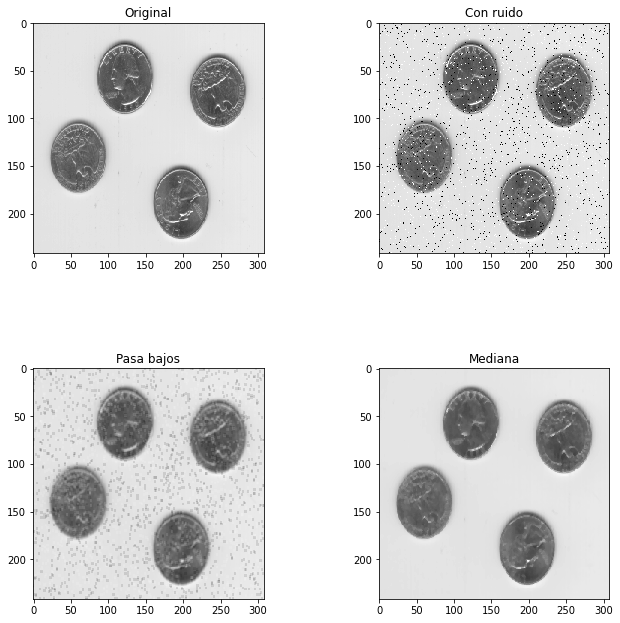

In [ ]:
img = cv2.imread('eight.tif')
fig_1 = plt.figure(figsize =(8,8))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.5, wspace = 0.5)
#Imagen original
fig_1.add_subplot(2,2,1)
plt.title("Original")
plt.imshow(img,interpolation='nearest', aspect='auto')

for row in range(0,img.shape[0]):
  saltpepper_noise = np.random.uniform(low=0,high=255,size=img.shape[1]);
  for col in range(0,img.shape[1]):
    noise_sample = saltpepper_noise[col]
    if noise_sample <5:
      img[row][col] = [0, 0, 0]
    elif noise_sample >250:
      img[row][col] = [255, 255, 255]
#Imagen con ruido "saltpepper"
fig_1.add_subplot(2,2,2)
plt.title("Con ruido")
plt.imshow(img,interpolation='nearest', aspect='auto')
#Imagen luego de ser filtrada por un LP
kernel = np.ones((3,3),np.float32)/9
filtered = cv2.filter2D(img,-1,kernel)
fig_1.add_subplot(2,2,3)
plt.title("Pasa bajos")
plt.imshow(filtered,interpolation='nearest', aspect='auto')
#Imagen filtrada tomando la mediana
med_filtered = cv2.medianBlur(img,3)
fig_1.add_subplot(2,2,4)
plt.title("Mediana")
plt.imshow(med_filtered,interpolation='nearest', aspect='auto')
plt.show()


###4. Luna (Laplaciano)

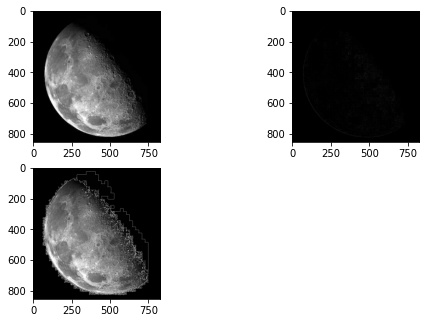

In [ ]:
moon_img = cv2.imread('moon.png')
fig_2 = plt.figure()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.5)
fig_2.add_subplot(2,2,1)
plt.imshow(moon_img,cmap='gray', vmin=0, vmax=255)
#Filtro Laplaciano
kernel = np.array([
                   [0,1,0],
                   [1,-4,1],
                   [0,1,0]
])
hp_filtered = cv2.filter2D(moon_img,-1,kernel)
hp_filtered[hp_filtered < 0] = 0
fig_2.add_subplot(2,2,2)
plt.imshow(hp_filtered,cmap='gray', vmin=0, vmax=255)

#item c
sharpened_img1 =moon_img - hp_filtered
#print(sharpened_img1[400][400:450])
fig_2.add_subplot(2,2,3)
plt.imshow(sharpened_img1,cmap='gray', vmin=0, vmax=255)
plt.show()


###5. High Boost

In [ ]:
def ApplyHighBoost(img,A=1):
  kernel = np.array([
                   [-1,-1,-1],
                   [-1,A+8,1],
                   [-1,-1,-1]
                  ])
  return cv2.filter2D(img,-1,kernel)

def MakeSubplot(img,fig,row,column,index,title):
  fig.add_subplot(row,column,index)
  plt.title(title)
  plt.imshow(img,cmap='gray', vmin=0)

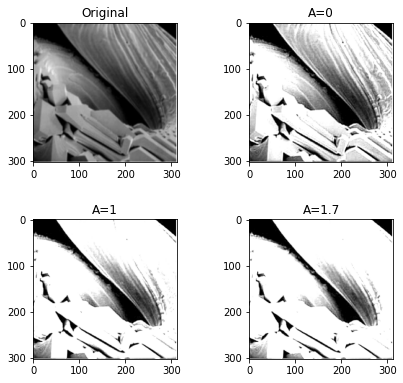

In [ ]:
boost_img = cv2.imread('boost.PNG')

#Original
fig_3 = plt.figure(figsize=(5,5))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.5)
MakeSubplot(boost_img,fig_3,2,2,1,title="Original")

#Laplaciano de la imagen original
laplaciano = ApplyHighBoost(boost_img,A=0)
MakeSubplot(laplaciano,fig_3,2,2,2,title="A=0")

#Sin high boost
not_boosted = ApplyHighBoost(boost_img,A=1)
MakeSubplot(not_boosted,fig_3,2,2,3,title="A=1")

#Con high boost
boosted = ApplyHighBoost(boost_img,A=1.7)
MakeSubplot(boosted,fig_3,2,2,4,title="A=1.7")

plt.show()

###6. Túnel (homomórfico)